In [71]:
import pandas as pd
import ast
from collections import Counter
import re
from sklearn.model_selection import train_test_split
import ast

import json
import spacy
nlp = spacy.load("en_core_web_sm")
from tqdm import tqdm
from collections import defaultdict 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet

import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [3]:
df = pd.read_csv('Recipe_dataset/NLGRecipe_KownCountriesOnly.csv')

In [4]:
df_countries = pd.read_csv('Recipe_dataset/countries.csv')
country_list = (df_countries['Name'])
natio_list = list(df_countries['Nationality'])

#Lower_casing all countries
low_country_list = []
low_natio_list = []
for i in range(len(country_list)):
    low_country_list.append(country_list[i].lower())
    low_natio_list.append(natio_list[i].lower())

In [44]:
cuntry_dict = Counter(countries)
# Remove entries with values less than or equal to 1
filtered_countries = Counter({k: v for k, v in cuntry_dict.items() if v > 5})

In [ ]:
filtered_countries

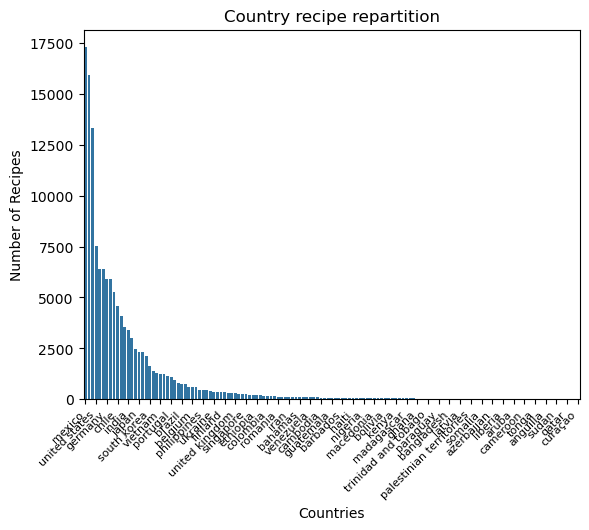

In [56]:
countries = list(df['countries'])
country_dict = Counter(countries)

# Convert Counter to a DataFrame
df = pd.DataFrame(list(filtered_countries.items()), columns=['Countries', 'Number of Recipes'])
df = df.sort_values(by='Number of Recipes', ascending=False)

# Create a bar plot
sns.barplot(x='Countries', y='Number of Recipes', data=df)

# Add labels and title
plt.xlabel('Countries')
plt.ylabel('Number of Recipes')
plt.title('Country recipe repartition')

#plt.xticks(rotation=45, ha='right')
plt.xticks(ticks=range(0, len(df['Countries']), 3), labels=df['Countries'][::3], rotation=45, ha='right', fontsize=8)
#plt.xticks(ticks=range(0, len(df['Country']), 3), labels=df['Country'][::3], rotation=45, ha='right') # Adjust fontsize as needed
# Show the plot
plt.show()

In [ ]:


# Example Counter dictionary named 'countries'
countries = Counter({'Canada': 50, 'USA': 100, 'Mexico': 75, 'France': 30, 'Germany': 40})

# Convert Counter to a DataFrame
df = pd.DataFrame(list(countries.items()), columns=['Country', 'Value'])

# Sort the DataFrame by Value in descending order


# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Value', data=df)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Bar Plot from Countries Dictionary')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


# Dataset Statistics

In [95]:
df = pd.read_csv('CulturalNovelty_DatasetStatistics.csv')
df.head()

,ID_Name,Nb recipes in KB,Train - Nb variations,Valid - Nb variations,Test - Nb variations,Ratio recipes KB variations,Ref Country,Nb different names,KB - Nb ingredients,KB - Text length,...,Valid - Nb ingredients,Test - Nb ingredients,Same Country - Nb ingredients,Different Country - Nb ingredients,Total - Nb new ingredients,Train - Nb new ingredients,Valid - Nb new ingredients,Test - Nb new ingredients,Same Country - Nb new ingredients,Different Country - Nb new ingredients
0,Congo square_recipe_390.json,294,0,38,33,4.140845,congo,2,112,227.598639,...,30,28,39,0,24,0,17,16,24,0
1,Pepper salad_recipe_496.json,2,19,3,5,0.074074,greece,1,27,367.500000,...,16,32,19,122,113,95,8,23,11,105
2,Sandwich_recipe_465.json,45,1171,154,162,0.030262,united states,1,214,548.333333,...,501,509,87,1981,1874,1600,416,419,46,1863
3,Cornbread_recipe_27.json,1511,395,258,262,1.651366,mexico,2,601,190.848445,...,282,271,298,578,507,364,129,136,142,412
4,Quiche_recipe_106.json,31,241,36,28,0.101639,italy,1,129,438.806452,...,135,111,49,463,402,339,89,69,21,395


In [97]:
df.columns

Index(['ID_Name', 'Nb recipes in KB', 'Train - Nb variations',
       'Valid - Nb variations', 'Test - Nb variations',
       'Ratio recipes KB variations', 'Ref Country', 'Nb different names',
       'KB - Nb ingredients', 'KB - Text length', 'Train Var - Text length',
       'Valid Var - Text length', 'Test Var - Text length',
       'KB - Clean length', 'Train Var - Clean length',
       'Valid Var - Clean length', 'Test Var - Clean length', 'KB - Nb Tokens',
       'Train Var - Nb Tokens', 'Valid Var - Nb Tokens',
       'Test Var - Nb Tokens', 'KB - Clean Nb tokens',
       'Train Var - Clean Nb tokens', 'Valid Var - Clean Nb tokens',
       'Test Var - Clean Nb tokens', 'Top1 Country', 'Top2 Country',
       'Top3 Country', 'Nb recipes same country',
       'Nb recipes different country', 'Total Nb different countries',
       'Train - Nb different country', 'Valid - Nb different country',
       'Test - Nb different country', 'Train - Nb ingredients',
       'Valid - Nb ingredie

In [182]:
data = list(df['Different Country - Nb new ingredients'])

average = statistics.mean(data)
median = statistics.median(data)
#variance = statistics.variance(data)
standard_deviation = statistics.stdev(data)

print(f"Average (mean): {average}")
print(f"Median: {median}")
#print(f"Variance: {variance}")
print(f"Standard Deviation: {standard_deviation}")

Average (mean): 275.748502994012
Median: 166
Standard Deviation: 346.22823776051905


In [ ]:
countries = list(df['Top3 Country'])
country_dict = Counter(countries)

# Convert Counter to a DataFrame
df_ = pd.DataFrame(list(country_dict.items()), columns=['Countries', 'Number of Recipes'])
df_ = df_.sort_values(by='Number of Recipes', ascending=False)

# Create a bar plot
sns.barplot(x='Countries', y='Number of Recipes', data=df_)

# Add labels and title
plt.xlabel('Countries')
plt.ylabel('Number of Recipes')
plt.title('Country repartition as the third most appearing in variations')

#plt.xticks(rotation=45, ha='right')
plt.xticks(rotation=45, ha='right', fontsize=6)
#plt.xticks(ticks=range(0, len(df['Country']), 3), labels=df['Country'][::3], rotation=45, ha='right') # Adjust fontsize as needed
# Show the plot
plt.show()

# Others

In [4]:
#We create the tokeenization function
def tokenize(text):
    return [tok.text for tok in nlp.tokenizer(str(text))]

In [165]:
df_country = df[df['countries'] == 'samoa']
title_list = list(df_country['title'])

In [167]:
new_title_list= []
for i, title in enumerate(title_list):
    title_toks = tokenize(str(title).lower())
    temp_list = []
    for token in title_toks:
        if token not in low_natio_list:
            temp_list.append(token)
    new_title = ' '.join(temp_list)
    new_title_list.append(new_title)

In [169]:
ditc_2 = Counter(new_title_list)

In [171]:
ditc_2

Counter({'samoa tartlets': 3,
         'samoa brownies': 3,
         'samoa cupcakes': 3,
         'samoa milkshake': 2,
         'homemade samoa cookies': 2,
         'samoa rice krispie treats': 2,
         'samoa bars': 2,
         'samoa rice': 1,
         'america samoa sweet bread(pao doce )  ': 1,
         "america samoa 's peanut butter chicken": 1,
         'mini samoa ® bundt ® cakes': 1,
         'samoa ® cheesecake cupcakes': 1,
         'green banana': 1,
         'panikeke': 1,
         'samoa pie': 1,
         'palusami': 1,
         'gimme samoa frappe': 1,
         'pani - keke samoa': 1,
         'samoa cookie cocktail': 1,
         "suafa'i - bananas and coconut cream": 1,
         'banana panikeke ( fried banana doughnuts )': 1,
         'sapa sui ( chop sui )': 1,
         'girl scout samoa cookies ( copycat )': 1,
         'samoa supreme bar cookies': 1,
         'stovetop " samoa " rice pudding': 1,
         'slaw from samoa': 1,
         'marinated raw fish in c

In [187]:
name_list = ["tartlet"]  #Mulled Wine
list_title = list(df['title'])
temp_ids = []
for j, title in enumerate(list_title):
    title = title.lower()
    for name in name_list:
        name = name.lower()
        if name in title:
            temp_ids.append(j)

list_of_ids = list(df.iloc[temp_ids]["Unnamed: 0"])
print(list_of_ids)

[903633, 927705, 958113, 1134353, 1160947, 1228514, 1242887, 1288611, 1312224, 1375797, 1446596, 1498472, 1508968, 1525795, 1534207, 1555052, 1571082, 1599211, 1679282, 1713559, 1756767, 1885990, 1921807, 2014619, 2015941, 2072224, 2089263, 2190738]


In [189]:
test = df[df['Unnamed: 0'].isin(list_of_ids)]

In [191]:
Counter(list(test['countries']))

Counter({'france': 6,
         'italy': 4,
         'samoa': 3,
         'switzerland': 3,
         'united states': 2,
         'netherlands': 2,
         'portugal': 2,
         'spain': 1,
         'germany': 1,
         'sweden': 1,
         'greece': 1,
         'canada': 1,
         'mexico': 1})

In [151]:
test[test['countries'] == 'morocco']['title']

64561                               Moroccan Charoset Balls
105088                                    Moroccan Haroseth
111677    Moroccan Haroset Truffles with Almonds and Fruits
123944                                   Moroccan Charosets
128593                 Moroccan Haroset/Charoset (Passover)
Name: title, dtype: object